In [10]:
# -- projecting embeddings in 2d space using pca or tsne or umap

import os
os.chdir('../ml') if os.getcwd().endswith('analysis') else None

from load_matrix import load_df
prepare_df = lambda df: df.set_index('label').iloc[:, 2:]

from sklearn.preprocessing import StandardScaler
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ComplEx_sample_df=prepare_df(load_df('Complex_sample_embeddings',folder_version='v2.10'))
ComplEx_sample_df.head()

 Complex embeddings detected in /mnt/c/Users/rayan/Documents/saclay/courses/deep-learning-and-artifical-intelligence/project/2526-m2geniomhe-GNN-sepsis/models/executions/GSE54514_enriched_ontology_degfilterv2.10/outputmodel_Complex_entity_embeddings.npy, splitting real+imag.


,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198,emb_199,disease_status
label,,,,,,,,,,,,,,,,,,,,,
Sample_GSM1317896,-2.652398,-1.051081,-0.615988,-4.781577,-3.305061,-0.092292,1.452199,0.083640,0.155525,2.874328,...,-0.153077,-2.873026,4.617657,1.316204,0.445186,-1.870901,3.869103,2.934563,1.198158,0
Sample_GSM1317897,2.823729,1.553474,-0.648988,0.051428,-2.276707,0.700808,1.597684,-0.589008,0.744576,-2.323140,...,3.124539,1.882942,2.217139,0.138735,4.018056,-2.730092,1.277904,-1.013049,-1.375556,0
Sample_GSM1317898,-0.999235,-2.766210,-2.037733,1.450907,-0.859509,-1.510864,0.836153,-1.570623,1.806335,3.195767,...,-2.917438,-0.182973,-1.940525,-3.807891,1.102227,-2.963328,1.961468,0.952314,-4.070546,0
Sample_GSM1317899,-1.088076,-4.309728,0.617413,0.934156,-1.384165,0.303986,0.130394,1.906853,0.383390,1.553881,...,0.725564,-1.325659,-1.241429,3.387842,0.322825,-4.164245,0.720317,0.982038,-1.188258,0
Sample_GSM1317900,-0.863737,0.303939,-1.076313,0.562551,-0.512388,-0.442778,3.107904,-2.124257,2.212472,-0.978011,...,-0.118195,-0.206208,0.458039,0.379941,-0.069726,-0.170621,-1.848339,1.669451,-2.472725,0


Text(0, 0.5, 'UMAP 2')

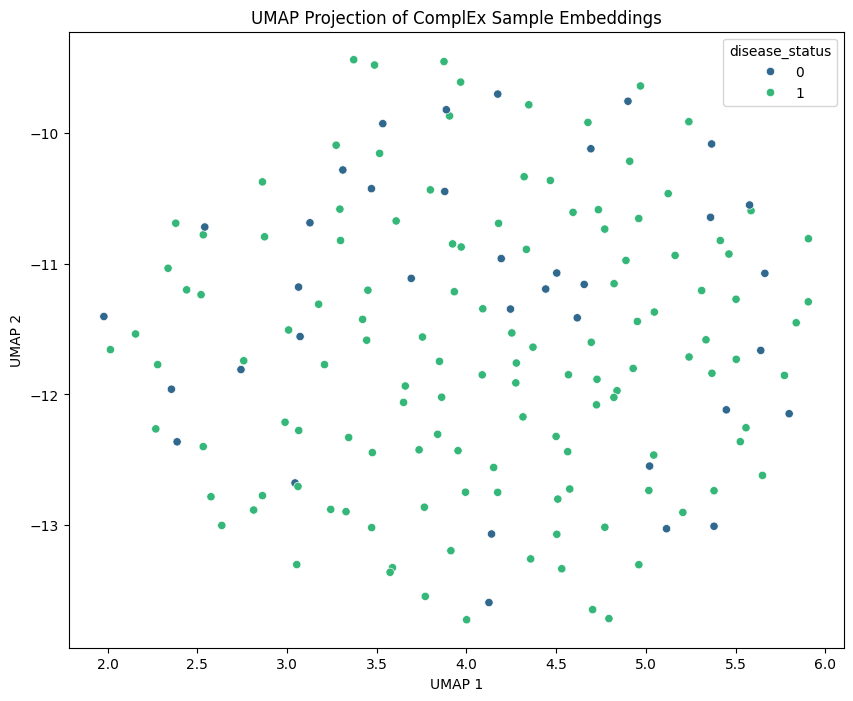

In [11]:
scaler = StandardScaler()
umap_model = UMAP(n_components=2, random_state=42)
embeddings_scaled = scaler.fit_transform(ComplEx_sample_df.drop(columns=['disease_status']))
embeddings_2d = umap_model.fit_transform(embeddings_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=ComplEx_sample_df['disease_status'], palette='viridis')
plt.title('UMAP Projection of ComplEx Sample Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

Text(0, 0.5, 'PCA 2')

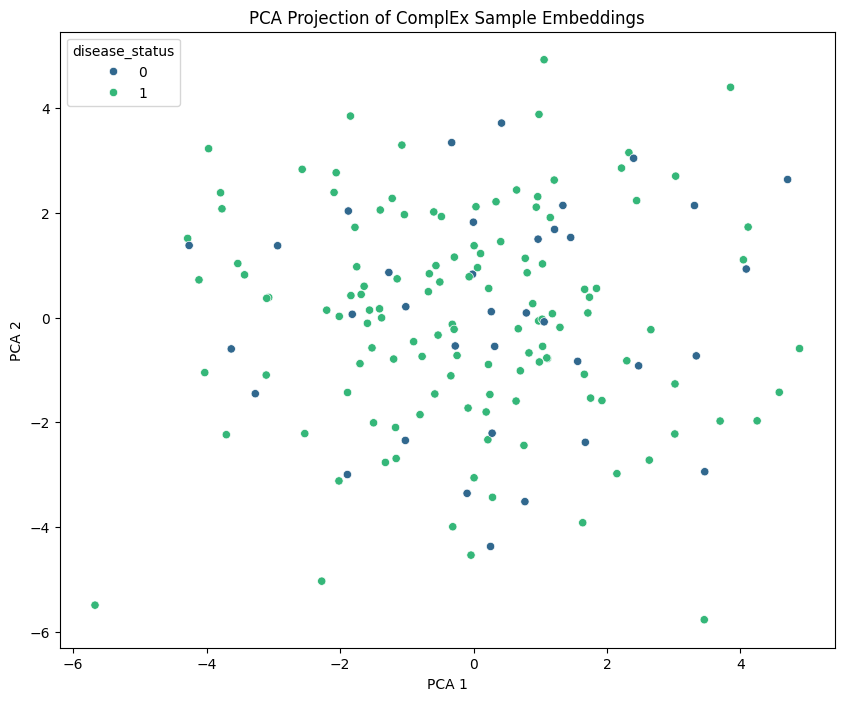

In [12]:
# -- pca
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
embeddings_2d = pca_model.fit_transform(embeddings_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=ComplEx_sample_df['disease_status'], palette='viridis')
plt.title('PCA Projection of ComplEx Sample Embeddings')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [14]:
# -- complex_proteins_embeddings 
ComplEx_proteins_df=prepare_df(load_df('Complex_protein_embeddings',folder_version='v2.10'))
ComplEx_proteins_df.head()

 Complex embeddings detected in /mnt/c/Users/rayan/Documents/saclay/courses/deep-learning-and-artifical-intelligence/project/2526-m2geniomhe-GNN-sepsis/models/executions/GSE54514_enriched_ontology_degfilterv2.10/outputmodel_Complex_entity_embeddings.npy, splitting real+imag.


,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198,emb_199,disease_status
label,,,,,,,,,,,,,,,,,,,,,
Sample_GSM1317896,0.119214,0.137526,0.089667,-0.140192,-0.069468,0.371630,-0.075591,0.080757,0.054372,0.062167,...,-0.309114,-0.060423,0.315431,0.156075,0.281332,0.058640,0.126763,0.089176,-0.061447,0
Sample_GSM1317897,0.112950,0.130428,0.094372,-0.122536,-0.073124,0.383820,-0.088749,0.067215,0.066570,0.060169,...,-0.311140,-0.066635,0.315938,0.154153,0.298245,0.057809,0.120952,0.073076,-0.071687,0
Sample_GSM1317898,0.123014,0.132655,0.095923,-0.131958,-0.071383,0.374845,-0.080423,0.078278,0.057684,0.065715,...,-0.310168,-0.062836,0.322497,0.155820,0.290155,0.067753,0.116921,0.076612,-0.062991,0
Sample_GSM1317899,0.121759,0.130479,0.098852,-0.132084,-0.071369,0.366935,-0.074154,0.080663,0.055001,0.065186,...,-0.300294,-0.063192,0.319544,0.155289,0.284807,0.064295,0.114649,0.075694,-0.073311,0
Sample_GSM1317900,0.116811,0.133548,0.088652,-0.141950,-0.072945,0.379428,-0.072677,0.073884,0.056056,0.060417,...,-0.318209,-0.065915,0.319632,0.151015,0.288928,0.059861,0.122101,0.084950,-0.068139,0


Text(0, 0.5, 'UMAP 2')

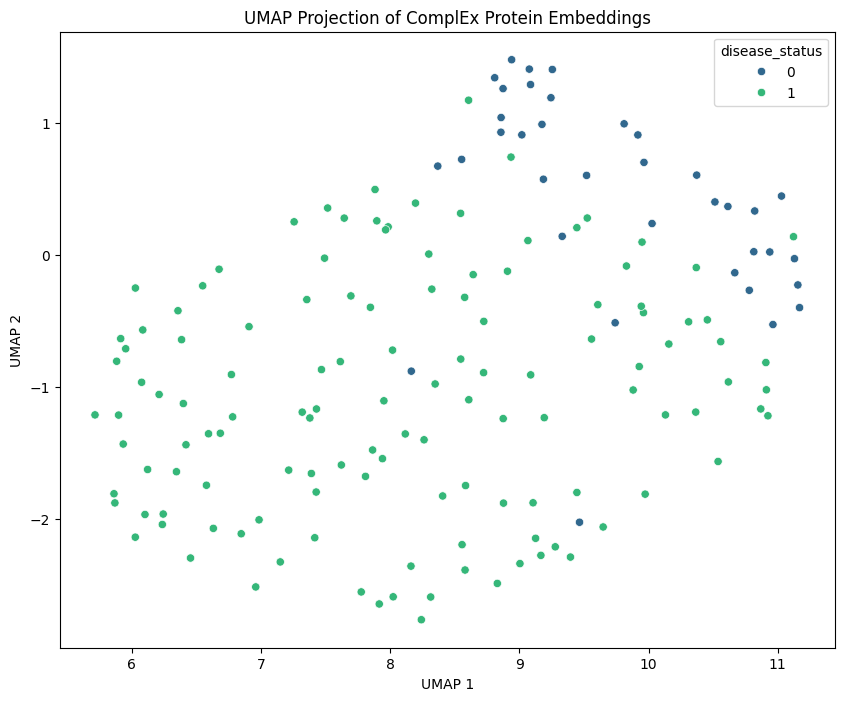

In [16]:
# -- umap
scaler = StandardScaler()
umap_model = UMAP(n_components=2, random_state=42)
embeddings_scaled = scaler.fit_transform(ComplEx_proteins_df)
embeddings_2d = umap_model.fit_transform(embeddings_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1],hue=ComplEx_proteins_df['disease_status'], palette='viridis')
plt.title('UMAP Projection of ComplEx Protein Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')